In [205]:
import os
import torch
import torch.nn as nn
import pickle
import numpy as np

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15
plt.rcParams['mathtext.fontset'] = 'cm'
data = "cifar10"
figpath = f'figures/cifar10/mixed_100'
os.makedirs(figpath, exist_ok=True)

In [206]:
# on va avoir
#    alpha | gamma
#      0.5 | 0.1
#      0.5 | 0.2
#      0.5 | 0.5
#      0.5 | 0.7

#      0.0 | 0.5
#      0.2 | 0.5
#      0.5 | 0.5
#      0.7 | 0.5


models = [
    "iid",        
    "const_and_zipfian-alpha0.7-a0.5",            
    "const_and_zipfian-alpha0.5-a0.2",          
    #"const_and_zipfian-alpha0.4-a0.0",          
    #"const_and_zipfian-alpha0.5-a0.1",          
    #"const_and_zipfian-alpha0.5-a0.1",          
    #"const_and_zipfian-alpha0.5-a0.5", 
    "zipfian-alpha0.4",    
]

labels = [
    r"$\gamma=1.0$",            
    r"$\alpha=0.7, \gamma=0.5$",
    r"$\alpha=0.5, \gamma=0.2$",    
    #r"$\alpha=0.5, \gamma=0.2$",   
    #r"$\alpha=0.5, \gamma=0.1$",   
    r"$\alpha=0.4, \gamma=0.0$",    
]


num_trials = 5

p = 2000
L = 1
lr = 5

results = {}

for model, label in zip(models, labels):
    results[model] = {}

    for i in range(1, num_trials + 1):
        path = os.path.join("results", f"{model}-p{p}-L{L}-lr{lr}-n5000/run{i}")
        gd = torch.load(os.path.join(path, "results.th")).__dict__
        if i == 1:
            results[model]["step"] = np.array(gd["step"])
        
        for key, val in gd.items():    
            if key != "step":
                if i == 1:
                    results[model][key] = [np.array(val)]
                else:
                    results[model][key].append(np.array(val))
                    
        prune = torch.load(os.path.join(path, "prune.th"))
        if i == 1:
            results[model]["num_pruned"] = np.array(prune["num_pruned"])
        for key, val in prune.items():
            if key != "num_pruned":
                if i == 1:
                    results[model]["pruned_"+key] = [np.array(val)]
                else:
                    results[model]["pruned_"+key].append(np.array(val))

    for key, val in results[model].items():
        if key not in ["step"]:
            results[model][key] = np.stack(val)

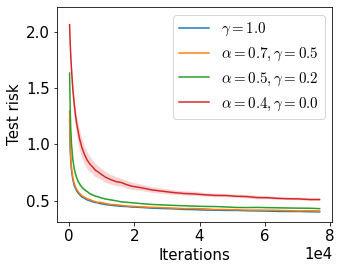

In [207]:
plt.figure(figsize=(5, 4))
#plt.subplot(121)
#for model, label in zip(models, labels):
#    step = results[model]["step"][1:]
#    val = results[model]["trainingrisk"][:,1:]    
#    mean, std = val.mean(0), val.std(0)    
#    plt.fill_between(step, mean - std, mean + std, alpha=0.2)
#    plt.plot(step, mean, label=label)
#plt.xlabel("Iterations")
#plt.ylabel("Training risk")
#plt.legend()
#plt.gca().ticklabel_format(style="sci", axis="x", scilimits=(0, 2))

#plt.subplot(122)
for model, label in zip(models, labels):
    step = results[model]["step"][1:]
    val = results[model]["testrisk"][:,1:]
    mean, std = val.mean(0), val.std(0)    
    plt.fill_between(step, mean - std, mean + std, alpha=0.2)
    plt.plot(step, mean, label=label)
plt.xlabel("Iterations")
plt.ylabel("Test risk")
plt.legend()
plt.gca().ticklabel_format(style="sci", axis="x", scilimits=(0, 2))
plt.tight_layout()
plt.savefig(os.path.join(figpath, "risks.pdf"), bbox_inches='tight')

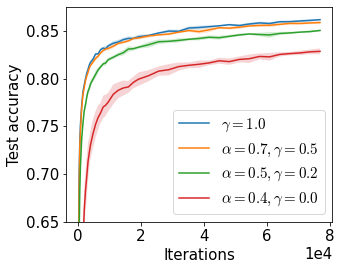

In [208]:
plt.figure(figsize=(5, 4))

for model, label in zip(models, labels):
    step = results[model]["step"][1:]
    val = results[model]["testacc"][:,1:]
    mean, std = val.mean(0), val.std(0)    
    plt.fill_between(step, mean - std, mean + std, alpha=0.2)
    plt.plot(step, mean, label=label)
plt.xlabel("Iterations")
plt.ylim((0.65, 0.875))
plt.ylabel("Test accuracy")
plt.legend()
plt.gca().ticklabel_format(style="sci", axis="x", scilimits=(0, 2))
plt.tight_layout()
plt.savefig(os.path.join(figpath, "accs.pdf"), bbox_inches='tight')
#plt.grid()

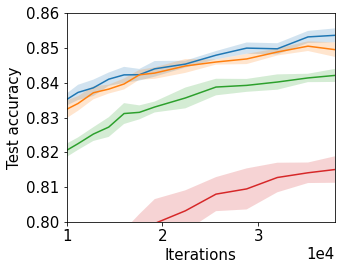

In [209]:
plt.figure(figsize=(5, 4))

for model, label in zip(models, labels):
    step = results[model]["step"][1:]
    val = results[model]["testacc"][:,1:]
    mean, std = val.mean(0), val.std(0)    
    plt.fill_between(step, mean - std, mean + std, alpha=0.2)
    plt.plot(step, mean, label=label)
plt.xlabel("Iterations")
plt.ylabel("Test accuracy")
plt.xlim((1e4, 3.8e4))
plt.ylim((0.80, 0.86))
#plt.legend()
plt.gca().ticklabel_format(style="sci", axis="x", scilimits=(0, 2))
plt.tight_layout()
plt.savefig(os.path.join(figpath, "accs_zoom.pdf"), bbox_inches='tight')
#plt.grid()

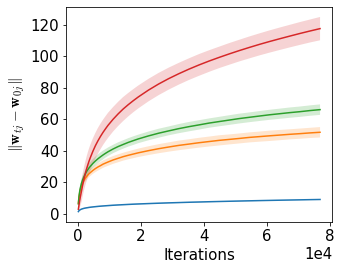

In [210]:
plt.figure(figsize=(5, 4))
for model, label in zip(models, labels):
    step = results[model]["step"][1:]    
    w1diff = results[model]["v1diff"][:,1:]
    max_js = w1diff[:, -1, :].argmax(-1)
    val = np.sqrt(w1diff[range(num_trials), :, max_js])
    mean, std = np.mean(val, axis=0), val.std(0)    
    plt.fill_between(step, mean - std, mean + std, alpha=0.2)
    plt.plot(step, mean, label=label)
#plt.legend()
plt.xlabel("Iterations")
plt.ylabel(r"$\Vert \mathbf{w}_{tj} - \mathbf{w}_{0j}\Vert$", fontsize=15)
plt.gca().ticklabel_format(style="sci", axis="x", scilimits=(0, 2))
plt.tight_layout()
plt.savefig(os.path.join(figpath, 'wdiff.pdf'), bbox_inches='tight')

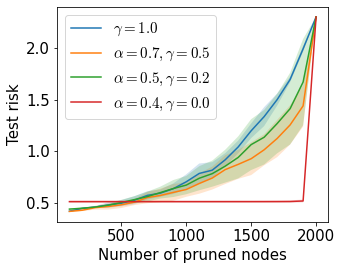

In [211]:
plt.figure(figsize=(5, 4))

for model, label in zip(models, labels):
    step = results[model]["num_pruned"]
    val = results[model]["pruned_testrisk"]
    mean, std = val.mean(0), val.std(0)
    plt.fill_between(step, mean - std, mean + std, alpha=0.2)
    plt.plot(step, mean, label=label)
plt.xlabel("Number of pruned nodes")
plt.ylabel("Test risk")
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(figpath, "prunerisk.pdf"), bbox_inches="tight")

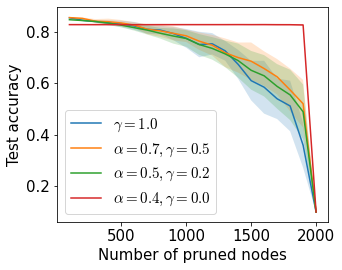

In [212]:
plt.figure(figsize=(5, 4))

for model, label in zip(models, labels):
    step = results[model]["num_pruned"]
    val = results[model]["pruned_testacc"]
    mean, std = val.mean(0), val.std(0)
    plt.fill_between(step, mean - std, mean + std, alpha=0.2)
    plt.plot(step, mean, label=label)
plt.xlabel("Number of pruned nodes")
plt.ylabel("Test accuracy")
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig(os.path.join(figpath, "pruneacc.pdf"), bbox_inches="tight")

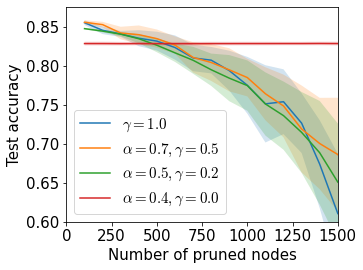

In [213]:
plt.figure(figsize=(5, 4))

for model, label in zip(models, labels):
    step = results[model]["num_pruned"]
    val = results[model]["pruned_testacc"]
    mean, std = val.mean(0), val.std(0)
    plt.fill_between(step, mean - std, mean + std, alpha=0.2)
    plt.plot(step, mean, label=label)
plt.xlabel("Number of pruned nodes")
plt.ylabel("Test accuracy")
plt.legend(loc='lower left')
plt.tight_layout()
plt.xlim((0,1500))
plt.ylim((0.6, 0.875))
plt.savefig(os.path.join(figpath, "pruneacc_zoom.pdf"), bbox_inches="tight")


In [169]:
def powerlaw(x, power, normalized=True):
    x = np.array(x)
    power = np.float(power)
    res = (x+1)**(-power)
    if normalized:
        res /= np.sum(res)
    return res

In [191]:
n_expe = 1000
results = np.zeros(n_expe)
for k in range(n_expe):
    lam = powerlaw(np.arange(2000), 1/0.7)
    ber = np.random.rand(2000) < 0.5
    results[k] = np.sum((ber*lam)**2)

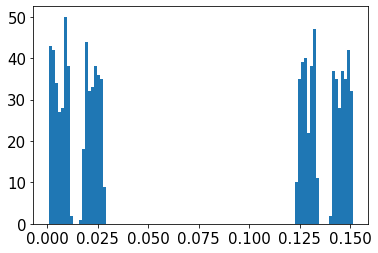

In [192]:
plt.hist(results, bins=100);

In [190]:
np.mean(results)

0.4766528508262605